# CALIDAD DE DATOS
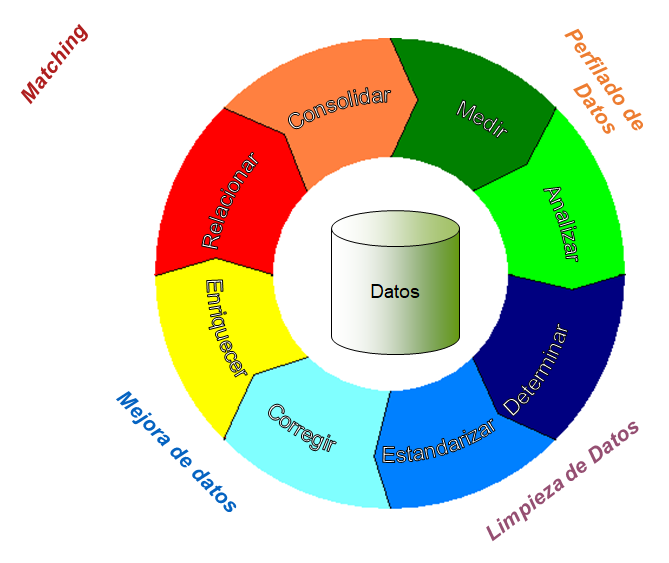


## PERFILADO DE DATOS

### Descripción del Dataset
**danceability:**
La bailabilidad describe la idoneidad de una pista para bailar según una combinación de elementos musicales, como el tempo, la estabilidad rítmica, la intensidad del compás y la regularidad general. Un valor de 0.0 es el menos bailable y 1.0 el más bailable.


**energy:**
La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Normalmente, las pistas energéticas se perciben rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptuales que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la velocidad de inicio y la entropía general.


**key:**
La tonalidad de la pista. Los números enteros se asignan a alturas mediante la notación estándar de clases de altura. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente.


**loudness:**
La sonoridad general de una pista en decibelios (dB). Los valores de sonoridad se promedian a lo largo de toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la calidad del sonido, el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 dB.

**mode:**
El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor se representa con 1 y menor con 0.

**speechiness:**
Speechiness detecta la presencia de palabras habladas en una pista.

**acousticness:**
Una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1,0 representa una confianza alta de que la pista es acústica.

**instrumentalness:**
Predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran instrumentales en este contexto.

**liveness:**
Detecta la presencia de una audiencia en la grabación.

**valence:**
Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista.

**tempo:**
El tempo general estimado de una pista en pulsaciones por minuto (BPM)

**duration_ms:**
La duración de la pista en milisegundos.

**time_signature:**
Un compás general estimado de una pista.

**liked:**
1 para canciones que me gustan, 0 para canciones que no me gustan

### Preprocesamiento de los Datos

In [7]:
#Importamos librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Se cargan los datos
data=pd.read_csv('spotify_raw.csv', sep=',')
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


Los valores de **Key**, **Mode**, **Time Signature** y **Liked** deben ser convertidos a categóricos ya que aunque se representan en números, solo pueden tener ciertos valores en concreto.

In [10]:
# Corrección de tipos de datos
data['key']=data['key'].astype('category')
data['mode']=data['mode'].astype('category')
data['time_signature']=data['time_signature'].astype('category')
data['liked']=data['liked'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      195 non-null    float64 
 1   energy            195 non-null    float64 
 2   key               195 non-null    category
 3   loudness          195 non-null    float64 
 4   mode              195 non-null    category
 5   speechiness       195 non-null    float64 
 6   acousticness      195 non-null    float64 
 7   instrumentalness  195 non-null    float64 
 8   liveness          195 non-null    float64 
 9   valence           195 non-null    float64 
 10  tempo             195 non-null    float64 
 11  duration_ms       195 non-null    int64   
 12  time_signature    195 non-null    category
 13  liked             195 non-null    category
dtypes: category(4), float64(9), int64(1)
memory usage: 17.0 KB


### Perfilado en HTML

In [6]:
!pip install ydata_profiling

ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.12.1 Requires-Python <3.13,>=3.7; 4.12.2 Requires-Python <3.13,>=3.7; 4.13.0 Requires-Python <3.13,>=3.7; 4.14.0 Requires-Python <3.13,>=3.7; 4.15.0 Requires-Python <3.13,>=3.7; 4.15.1 Requires-Python <3.13,>=3.7; 4.16.0 Requires-Python <3.13,>=3.7; 4.16.1 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python

In [19]:
# Cargar librería para Profiling
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data



ImportError: Numba needs NumPy 1.24 or less

In [ ]:
# Guardamos en HTML el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Guía de Perfilado

**Completitud:** ¿Está toda la información disponible? ¿Hay datos faltantes o ausentes?

**Exactitud:**¿La información es correcta y libre de error?

**Conformidad:** ¿Los valores de los datos están conformes con los formatos esperados? Ejemplo: Una fecha en formato AAAA/MM/DD cuando debería ser DD/MM/AAAA.

**Oportunidad:** ¿La información llega cuando se necesita?

**Duplicidad:** ¿Existen múltiples instancias, innecesarias de los mismos objetos de datos en el conjunto de datos?

**Integridad:** ¿Faltan datos relacionados importantes? ¿Es clara la conectividad y las relaciones con otros datos?

### Análisis del reporte
* **Completitud:**  Alta completitud, No hay valores nulos o faltantes

* **Exactitud:** No hay indicios de errores formales (e.g., valores negativos incorrectos)

* **Conformidad:** Alta conformidad, Los formatos son coherentes

* **Oportunidad:** No evaluable

* **Duplicidad:** Sin duplicados

* **Integridad:**  Moderada (estructuralmente completa, pero con desequilibrios), No hay claves faltantes, pero hay alta correlación entre muchas variables, y desequilibrio en time_signature y instrumentalness (40% ceros), lo cual puede afectar la consistencia de relaciones internas.

## LIMPIEZA  DE LOS DATOS
1. Detección de duplicados
2. Selección de datos
3. Limpieza de atípicos
4. Limpieza de nulos



### 1. Detección de duplicados

In [11]:
# 1. Detección y eliminación de duplicados
print("Duplicados antes de eliminar:", data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicados después de eliminar:", data.duplicated().sum())

Duplicados antes de eliminar: 0
Duplicados después de eliminar: 0


### 2. Selección de Datos

In [12]:
columnas_seleccionadas = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'time_signature', 'liked'
]

data = data[columnas_seleccionadas]

### 3. Limpieza de datos atípicos: se asigna nulo

In [13]:
# Función para detectar y reemplazar outliers con NaN usando IQR
def limpiar_outliers_IQR(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = (df[col] < limite_inferior) | (df[col] > limite_superior)
        print(f"{col}: {outliers.sum()} valores atípicos encontrados")

        # Reemplazar los outliers con NaN
        df.loc[outliers, col] = np.nan
    return df

# Lista de columnas numéricas a limpiar
columnas_numericas = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Aplicar la limpieza
data = limpiar_outliers_IQR(data, columnas_numericas)

# Verificación rápida
print("\nCantidad de valores nulos después de limpiar outliers:")
print(data.isna().sum())


danceability: 0 valores atípicos encontrados
energy: 15 valores atípicos encontrados
loudness: 20 valores atípicos encontrados
speechiness: 3 valores atípicos encontrados
acousticness: 0 valores atípicos encontrados
instrumentalness: 48 valores atípicos encontrados
liveness: 23 valores atípicos encontrados
valence: 0 valores atípicos encontrados
tempo: 0 valores atípicos encontrados
duration_ms: 9 valores atípicos encontrados

Cantidad de valores nulos después de limpiar outliers:
danceability         0
energy              15
key                  0
loudness            20
mode                 0
speechiness          3
acousticness         0
instrumentalness    48
liveness            23
valence              0
tempo                0
duration_ms          9
time_signature       0
liked                0
dtype: int64


### 4. Limpieza de datos nulos: Imputación

In [14]:
from sklearn.impute import SimpleImputer


# Lista de columnas numéricas (excluyendo 'liked', que es la variable objetivo)
columnas_numericas = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

# Imputación de nulos con la media
imp_media = SimpleImputer(missing_values=np.nan, strategy='mean')
data[columnas_numericas] = imp_media.fit_transform(data[columnas_numericas])

# Verificación
print("Resumen del DataFrame después de imputar:")
print(data.info())



Resumen del DataFrame después de imputar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      195 non-null    float64 
 1   energy            195 non-null    float64 
 2   key               195 non-null    category
 3   loudness          195 non-null    float64 
 4   mode              195 non-null    category
 5   speechiness       195 non-null    float64 
 6   acousticness      195 non-null    float64 
 7   instrumentalness  195 non-null    float64 
 8   liveness          195 non-null    float64 
 9   valence           195 non-null    float64 
 10  tempo             195 non-null    float64 
 11  duration_ms       195 non-null    float64 
 12  time_signature    195 non-null    category
 13  liked             195 non-null    category
dtypes: category(4), float64(10)
memory usage: 17.0 KB
None


In [15]:
# Mostrar los valores (medias) usados para imputar cada columna numérica
print("Valores de imputación (media) para cada variable numérica:")
print(imp_media.statistics_)


Valores de imputación (media) para cada variable numérica:
[ 6.36656410e-01  6.88480556e-01 -7.58488000e+00  1.43092187e-01
  3.19093091e-01  3.05962476e-03  1.15876744e-01  4.93631795e-01
  1.21086174e+02  2.04327339e+05]


## MEJORA DE LOS DATOS


### 1. Análisis de correlaciones

In [22]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, columns=['time_signature','key'], drop_first=False, dtype=int)
data_num = pd.get_dummies(data_num, columns=['mode', 'liked'], drop_first=True, dtype=int)
data_num.head()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,liked_1
0,0.803,0.624000,-6.76400,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524.0,...,0,0,0,1,0,0,0,0,0,0
1,0.762,0.703000,-7.95100,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178.0,...,0,0,0,0,0,0,1,0,0,1
2,0.261,0.688481,-7.58488,0.0419,0.992,0.003060,0.1020,0.0382,75.296,286987.0,...,0,0,0,0,0,0,0,0,1,0
3,0.722,0.736000,-6.99400,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920.0,...,0,0,0,0,0,0,0,0,0,1
4,0.787,0.572000,-7.51600,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413.0,...,0,0,0,0,0,0,0,0,1,1


In [23]:
# Correlaciones
data_num.corr()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,liked_1
danceability,1.000000,-0.233854,-0.012094,0.402644,-0.234176,-1.306505e-01,0.011601,0.612344,0.223522,-0.249325,...,-0.064017,0.047492,0.042549,0.065193,-0.237707,-0.001953,-0.039559,0.083766,0.043759,0.569425
energy,-0.233854,1.000000,0.524298,-0.028782,-0.512224,-5.930645e-02,0.129052,0.036959,0.081195,-0.070264,...,0.004197,0.009354,0.043809,-0.090975,0.241574,-0.106205,0.075905,0.040648,-0.027343,-0.029261
loudness,-0.012094,0.524298,1.000000,0.141540,-0.197331,-1.327481e-01,0.066744,-0.109564,0.085420,-0.076557,...,-0.017375,0.006121,0.076682,-0.000382,0.076777,-0.051878,-0.099705,0.021926,0.047066,0.292202
speechiness,0.402644,-0.028782,0.141540,1.000000,-0.108184,-1.561598e-01,0.059497,0.211688,0.320028,-0.424004,...,0.001364,-0.118251,0.016247,-0.098168,0.000097,-0.051054,-0.025138,0.049672,0.056392,0.590932
acousticness,-0.234176,-0.512224,-0.197331,-0.108184,1.000000,-2.545051e-03,-0.076955,-0.313806,-0.255097,0.130012,...,0.129033,-0.002569,-0.001679,0.029707,-0.160781,0.105212,-0.064010,-0.007974,-0.025709,-0.179375
instrumentalness,-0.130651,-0.059306,-0.132748,-0.156160,-0.002545,1.000000e+00,-0.129242,0.013161,-0.100260,0.114691,...,-0.037584,0.116830,-0.026841,-0.057899,-0.045964,0.049452,0.015861,-0.000721,-0.039942,-0.209422
liveness,0.011601,0.129052,0.066744,0.059497,-0.076955,-1.292420e-01,1.000000,0.047401,0.055403,-0.096752,...,-0.046332,0.111256,-0.038243,-0.031251,-0.028758,0.015171,0.020175,0.022162,-0.063274,0.098564
valence,0.612344,0.036959,-0.109564,0.211688,-0.313806,1.316074e-02,0.047401,1.000000,0.218017,-0.197078,...,-0.131776,0.139580,-0.007985,0.076475,-0.086951,-0.039371,-0.002781,0.083982,0.033409,0.268653
tempo,0.223522,0.081195,0.085420,0.320028,-0.255097,-1.002602e-01,0.055403,0.218017,1.000000,-0.285752,...,0.005060,0.127365,0.046366,-0.122911,-0.036792,0.117825,-0.037563,0.085369,-0.036270,0.371202
duration_ms,-0.249325,-0.070264,-0.076557,-0.424004,0.130012,1.146913e-01,-0.096752,-0.197078,-0.285752,1.000000,...,0.030444,0.000402,0.034058,-0.066596,-0.008093,0.031443,0.132095,-0.109077,-0.119314,-0.533515


<Axes: >

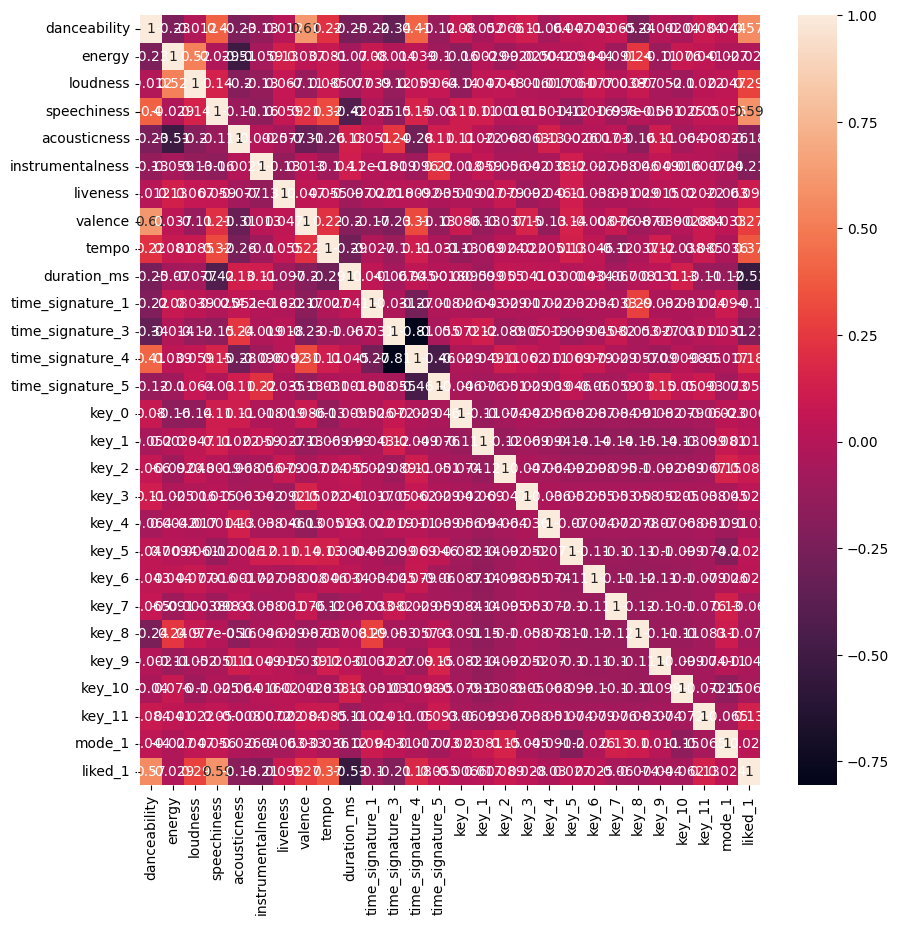

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

En este caso se eliminarán las variables **liveness**, **instrumentalness**, **key**, **energy** y **mode** por tener una correlación menor a 0.1 con la variable objetivo, lo que las hace irrelevantes.

No hubo correlaciones peligrosamente altas por lo cual no hay variables redundantes en este caso.

In [ ]:
# Redundancias: correlaciones mayores a 0.8 en  la matriz
# Irrelevancia: correlaciones muy bajas con la variable objetivo (menor a 0.05)
data = data.drop('energy',axis=1)
data = data.drop('liveness',axis=1)
data = data.drop('instrumentalness',axis=1)
data = data.drop('key',axis=1)
data = data.drop('mode',axis=1)

KeyError: "['#'] not found in axis"

### 2. Balanceo de datos (Clasificación)
En este caso no se necesita balanceo de los datos ya que la variable objetivo está bien balanceada.

/var/folders/ky/y775dql12ds5g7v5n_vs4y6r0000gp/T/ipykernel_26954/1259910939.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["liked"]).plot(kind="bar")


<Axes: xlabel='liked'>

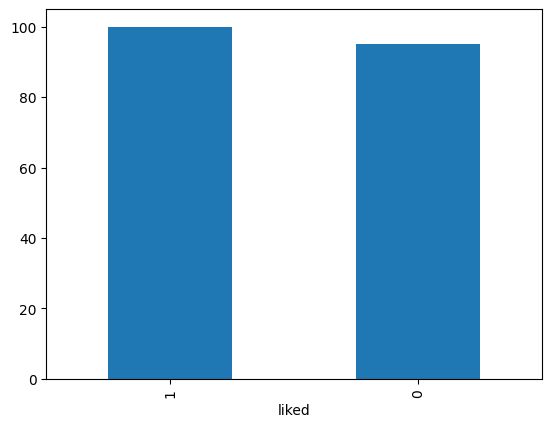

In [26]:
# Variable objetivo
pd.value_counts(data["liked"]).plot(kind="bar")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   danceability    195 non-null    float64 
 1   loudness        195 non-null    float64 
 2   speechiness     195 non-null    float64 
 3   acousticness    195 non-null    float64 
 4   valence         195 non-null    float64 
 5   tempo           195 non-null    float64 
 6   duration_ms     195 non-null    float64 
 7   time_signature  195 non-null    category
 8   liked           195 non-null    category
dtypes: category(2), float64(7)
memory usage: 11.5 KB


In [28]:
# Guardamos los datos preparados
data.to_csv('spotify_prepared.csv')